In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
'''
here, we are doing img classification, using mnist dataset. in the dataset, we have 28 by 28 pixels images. note that each image is representing an input feature.
'''

'\nhere, we are doing img classification, using mnist dataset. in the dataset, we have 28 by 28 pixels images. note that each image is representing an input feature. \n'

In [ ]:
X_train.shape
'''
60000 images used in the training, each image having 28 rows and 28 columns.
'''

'\n60000 images used in the training, each image having 28 rows and 28 columns. \n'

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train
'''
what we have to predict using the images. so, say the first handwritten img is 5. so, we also need to predict that 5 is written. you can see in the y_train index 0 where 5 is
what is the actual o/p for X_train[0]
'''

'\nwhat we have to predict using the images. so, say the first handwritten img is 5. so, we also need to predict that 5 is written. you can see in the y_train index 0 where 5 is\nwhat is the actual o/p for X_train[0]\n'

'\nX_train[0] ---> first image of the dataset, represented by 28 by 28 pixels \n'

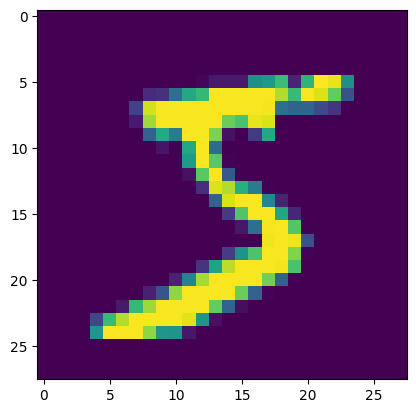

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
'''
X_train[0] ---> first image of the dataset, represented by 28 by 28 pixels
'''

In [ ]:
X_train = X_train/255
X_test = X_test/255
'''
each pixel has a value from 0 to 255. we are scaling them from 0 to 1, by dividing each value with 255.
'''

'\neach pixel has a value from 0 to 255. we are scaling them from 0 to 1, by dividing each value with 255. \n'

In [ ]:
X_train[0]
'''
you can clearly see the 28 pixels arranged in a row and 28 such rows below
'''

'\nyou can clearly see the 28 pixels arranged in a row and 28 such rows below \n'

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #input layer
'''
up till now, we had features in a single row. like in breast cancer classification. but here, all the pixels are nothing but features and they are arranged in a 2-D matrix. so,
we need to arrange them in 1-D. hence, for that, we need to flatten the matrix into a single row. therefore, we used flatten where we just give the total number of input features
which is nothing but 28*28
'''
model.add(Dense(128,activation='relu')) #1st hidden layer
model.add(Dense(32,activation='relu')) #2 hidden layer
model.add(Dense(10,activation='softmax')) #output layer
'''
10 nodes in the output because it is a multiclass classification problem because we have o/p ranging from 0-9.
'''

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


'\n10 nodes in the output because it is a multiclass classification problem because we have o/p ranging from 0-9. \n'

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8614 - loss: 0.4800 - val_accuracy: 0.9583 - val_loss: 0.1443
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1197 - val_accuracy: 0.9671 - val_loss: 0.1118
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9770 - loss: 0.0774 - val_accuracy: 0.9731 - val_loss: 0.0928
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9827 - loss: 0.0577 - val_accuracy: 0.9730 - val_loss: 0.0874
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0421 - val_accuracy: 0.9739 - val_loss: 0.0896
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0347 - val_accuracy: 0.9743 - val_loss: 0.1003
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9916 - loss: 0.0283 - val_accuracy: 0.9750 - val_loss: 0.1026
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9924 - loss: 0.0224 -

In [ ]:
y_prob = model.predict(X_test)
'''
always X_test is used for prediction purposes as it is the unseen data. also, we get Y in the form of probabilities.
'''

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'\nalways X_test is used for prediction purposes as it is the unseen data. also, we get Y in the form of probabilities. \n'

In [ ]:
y_pred = y_prob.argmax(axis=1)
'''
converting to the "class" output
'''

'\nconverting to the "class" output\n'

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741

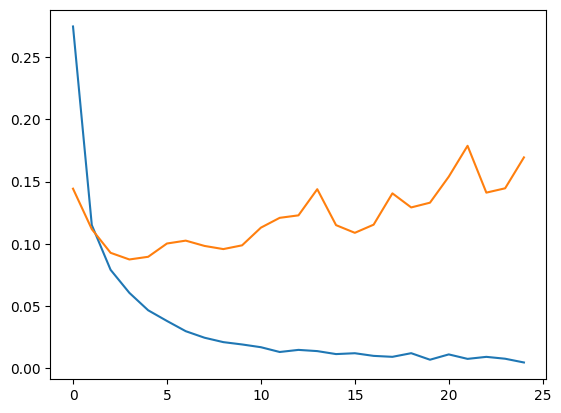

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

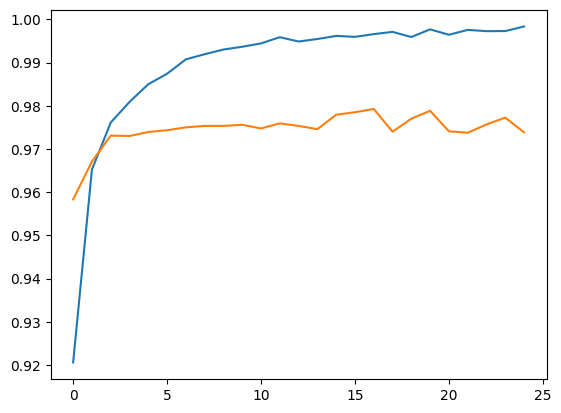

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

'\nwe are going to now predict the second image (index = 1) of the test data, which is 2. \n'

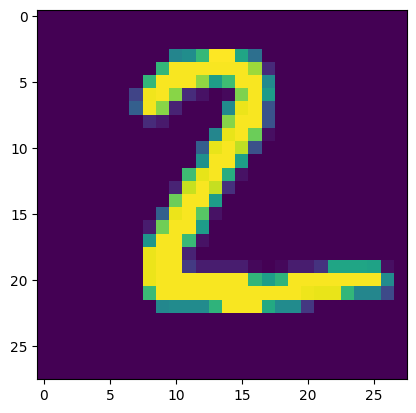

In [ ]:
plt.imshow(X_test[1])
'''
we are going to now predict the second image (index = 1) of the test data, which is 2.
'''

In [ ]:
y_semifinal = model.predict(X_test[1].reshape(1,28,28)) #reshaping the dimensions
y_final = y_semifinal.argmax(axis=1)
'''
NOTE:- whenever you are using an activation function other than sigmoid, the predicted o/p will always be in the form of probabilities. so, when you want to convert these
probabilities into a "class o/p" you HAVE to use argmax.
'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


'\nNOTE:- whenever you are using an activation function other than sigmoid, the predicted o/p will always be in the form of probabilities. so, when you want to convert these\nprobabilities into a "class o/p" you HAVE to use argmax.\n'

In [ ]:
y_final

array([2])